<a href="https://colab.research.google.com/github/rachitss/Quant_Comp_Lab/blob/main/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install numpy qiskit[visualization] qiskit_aer notebook jupyterlab ipywidgets matplotlib seaborn --upgrade

In [3]:
# Quantumn Coin Flip

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import ipywidgets as widgets
from IPython.display import display

# Widget setup
button_play = widgets.Button(description='Play')
gate_choice = widgets.Dropdown(
    options=[('Identity', 'i'), ('Bit Flip', 'x')],
    description='Your Move:',
    disabled=False,
)
output_area = widgets.Output()

def on_play_clicked(b):
    output_area.clear_output()
    with output_area:
        # Build the quantum circuit (1 qubit, 1 classical bit)
        qc = QuantumCircuit(1, 1)
        # Step 1: Quantum's move (Hadamard)
        qc.h(0)
        # Step 2: Your move
        if gate_choice.value == 'i':
            qc.id(0)
        elif gate_choice.value == 'x':
            qc.x(0)
        # Step 3: Quantum's move (Hadamard)
        qc.h(0)
        # Measure
        qc.measure(0, 0)

        # Qiskit 2.0+ compliant simulation
        backend = AerSimulator()
        tqc = transpile(qc, backend)
        job = backend.run(tqc, shots=8192)
        result = job.result()
        counts = result.get_counts()

        # Determine winner (official Qiskit dict handling)
        if len(counts) == 1 and '0' in counts:
            print("You Lose to Quantum. Quantum Computer Wins.")
        elif len(counts) == 1 and '1' in counts:
            print("You Win against Quantum Computer!")
        else:
            print("Either Quantum or You Wins (it's a tie in simulation).")

        display(qc.draw('mpl'))
        display(plot_histogram(counts))

button_play.on_click(on_play_clicked)

# Display the interactive widget
display(widgets.VBox([gate_choice, button_play, output_area]))


2 qubits, pi ≈ 2.0
3 qubits, pi ≈ 4.0
4 qubits, pi ≈ 2.6666666666666665
5 qubits, pi ≈ 3.2
6 qubits, pi ≈ 3.2
7 qubits, pi ≈ 3.2
8 qubits, pi ≈ 3.1219512195121952
9 qubits, pi ≈ 3.1604938271604937
10 qubits, pi ≈ 3.1411042944785277
11 qubits, pi ≈ 3.1411042944785277
12 qubits, pi ≈ 3.1411042944785277


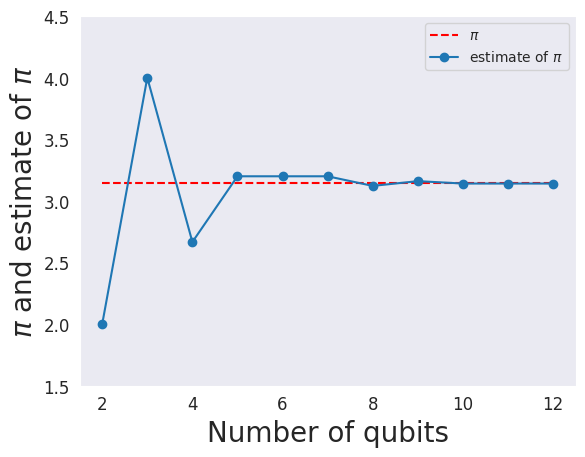

In [4]:
# for Estimating Pi Using QPE

from IPython.display import clear_output
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plotter
import seaborn as sns, operator
sns.set_style("dark")

pi = np.pi

def qft_dagger(circ_, n_qubits):
    for qubit in range(int(n_qubits/2)):
        circ_.swap(qubit, n_qubits-qubit-1)
    for j in range(0, n_qubits):
        for m in range(j):
            circ_.cp(-np.pi/float(2**(j-m)), m, j)
        circ_.h(j)

def qpe_pre(circ_, n_qubits):
    circ_.h(range(n_qubits))
    circ_.x(n_qubits)
    for x in reversed(range(n_qubits)):
        for _ in range(2**(n_qubits-1-x)):
            circ_.cp(1, n_qubits-1-x, n_qubits)

def run_job(circ, backend, shots=1000, optimization_level=0):
    t_circ = transpile(circ, backend, optimization_level=optimization_level)
    job = backend.run(t_circ, shots=shots)
    return job.result().get_counts()

simulator = AerSimulator()

def get_pi_estimate(n_qubits):
    circ = QuantumCircuit(n_qubits + 1, n_qubits)
    qpe_pre(circ, n_qubits)
    circ.barrier()
    qft_dagger(circ, n_qubits)
    circ.barrier()
    circ.measure(range(n_qubits), range(n_qubits))
    counts = run_job(circ, backend=simulator, shots=10000, optimization_level=0)
    max_counts_result = max(counts, key=counts.get)
    max_counts_result = int(max_counts_result, 2)
    theta = max_counts_result/2**n_qubits
    return (1./(2*theta))

nqs = list(range(2, 13))
pi_estimates = []
for nq in nqs:
    thisnq_pi_estimate = get_pi_estimate(nq)
    pi_estimates.append(thisnq_pi_estimate)
    print(f"{nq} qubits, pi ≈ {thisnq_pi_estimate}")

plotter.plot(nqs, [pi]*len(nqs), '--r')
plotter.plot(nqs, pi_estimates, '.-', markersize=12)
plotter.xlim([1.5, 12.5])
plotter.ylim([1.5, 4.5])
plotter.legend(['$\pi$', 'estimate of $\pi$'])
plotter.xlabel('Number of qubits', fontdict={'size':20})
plotter.ylabel('$\pi$ and estimate of $\pi$', fontdict={'size':20})
plotter.tick_params(axis='x', labelsize=12)
plotter.tick_params(axis='y', labelsize=12)
plotter.show()


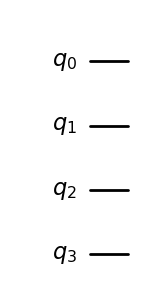

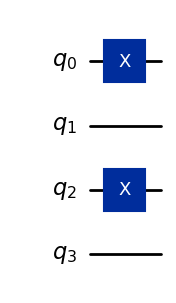

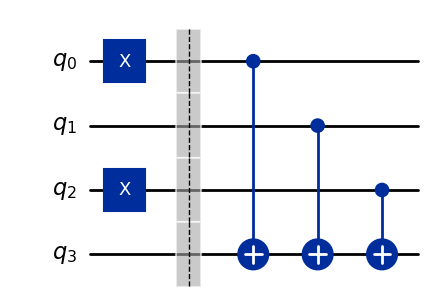

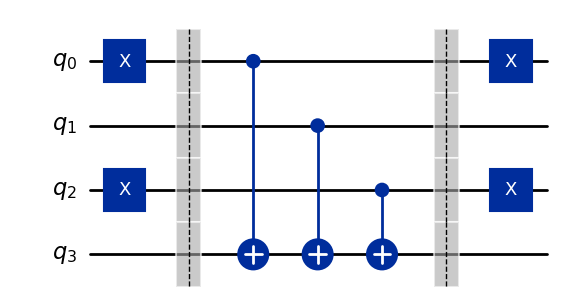

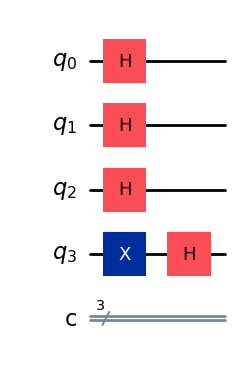

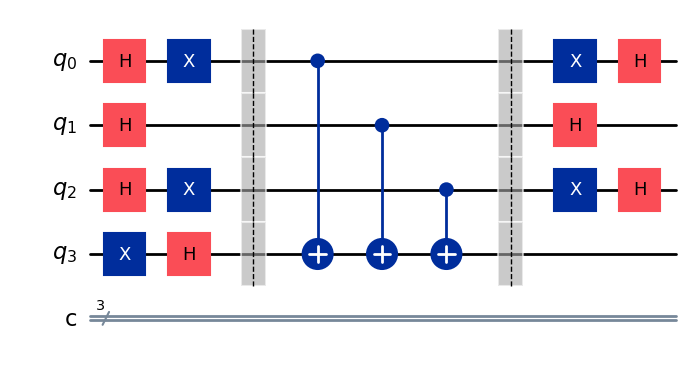

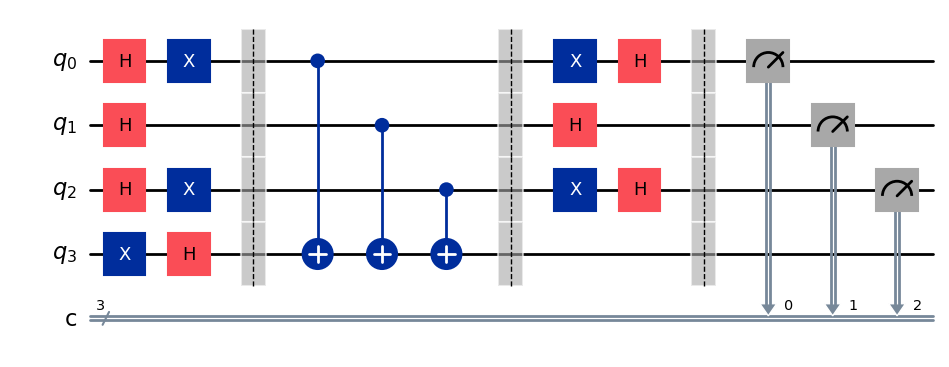

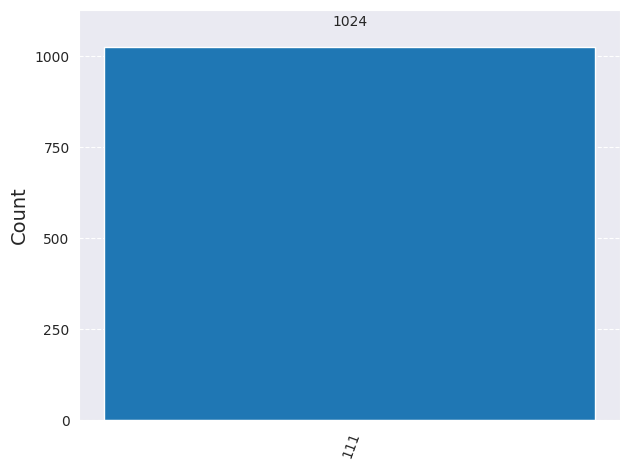

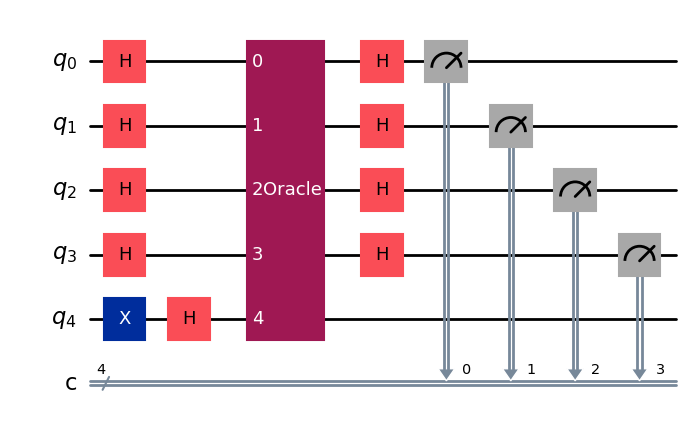

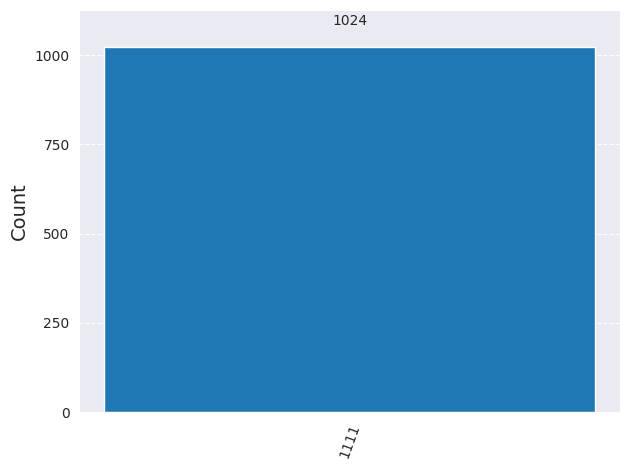

In [5]:
# Deutsch-Jozsa Algorithm.

import numpy as np
import matplotlib.pyplot as plotter
import seaborn as sns, operator
sns.set_style("dark")

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display


# Set the length of the n-bit input string
n = 3

const_oracle = QuantumCircuit(n+1)
output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)
display(const_oracle.draw('mpl'))

balanced_oracle = QuantumCircuit(n+1)
b_str = "101"
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
display(balanced_oracle.draw('mpl'))

balanced_oracle.barrier()
for qubit in range(n):
    balanced_oracle.cx(qubit, n)
display(balanced_oracle.draw('mpl'))

balanced_oracle.barrier()
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
display(balanced_oracle.draw('mpl'))

dj_circuit = QuantumCircuit(n+1, n)
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.x(n)
dj_circuit.h(n)
display(dj_circuit.draw('mpl'))

dj_circuit = dj_circuit.compose(balanced_oracle)
for qubit in range(n):
    dj_circuit.h(qubit)
display(dj_circuit.draw('mpl'))

dj_circuit.barrier()
for i in range(n):
    dj_circuit.measure(i, i)
display(dj_circuit.draw('mpl'))

# Use AerSimulator (Qiskit 2.0+)
simulator = AerSimulator()
transpiled_dj_circuit = transpile(dj_circuit, simulator)
results = simulator.run(transpiled_dj_circuit, shots=1024).result()
answer = results.get_counts()
display(plot_histogram(answer))

# ...we have a 0% chance of measuring 000.
assert answer.get('000', 0) == 0

def dj_oracle(case, n):
    oracle_qc = QuantumCircuit(n+1)
    if case == "balanced":
        b = np.random.randint(1, 2**n)
        b_str = format(b, '0'+str(n)+'b')
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
    if case == "constant":
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle"
    return oracle_gate

def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    dj_circuit.x(n)
    dj_circuit.h(n)
    for qubit in range(n):
        dj_circuit.h(qubit)
    dj_circuit.append(oracle, range(n+1))
    for qubit in range(n):
        dj_circuit.h(qubit)
    for i in range(n):
        dj_circuit.measure(i, i)
    return dj_circuit

n = 4
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
display(dj_circuit.draw('mpl'))

simulator = AerSimulator()
transpiled_dj_circuit = transpile(dj_circuit, simulator)
results = simulator.run(transpiled_dj_circuit, shots=1024).result()
answer = results.get_counts()
display(plot_histogram(answer))
